
## 1- Reading the Data

In [1]:
# Primary libraries 

from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# regular EDA and ML libraries 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# loading the dataframe

file_path = '/content/drive/My Drive/NN/project/bank.csv'
df = pd.read_csv(file_path)

In [4]:
# Shape,size,datatypes,null values  

df.shape

(10000, 14)

In [5]:
df.info()

# Problematic columns of type 'object' :    Surname, Geography, Gender   --> to change into type 'string'

# Noise columns : RowNumber , CustomerID

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isna().sum()
# no missing values 

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
#checking the numerical columns' Descriptive statistics

df.describe().transpose()

# skewness can be seen ( mean > median ) for some attributes and normalisation should be implemented down the road


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 2- Dropping and casting columns



In [0]:
df  = df.drop(["RowNumber",	"CustomerId",	"Surname"] , axis=1)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [0]:
df['Geography'] = df['Geography'].astype('string')

In [0]:
df['Gender'] = df['Gender'].astype('string')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  string 
 2   Gender           10000 non-null  string 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), string(2)
memory usage: 859.5 KB


In [0]:
# Creating Dummy variables for 'Geography' and 'Gender'

df= pd.get_dummies(df,columns=['Geography','Gender'])

In [17]:
df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


# 3- Features X and Target y

In [0]:
X = df.drop(columns='Exited')

In [19]:
X.shape

(10000, 13)

In [0]:
y=df['Exited']

In [21]:
y.shape

(10000,)

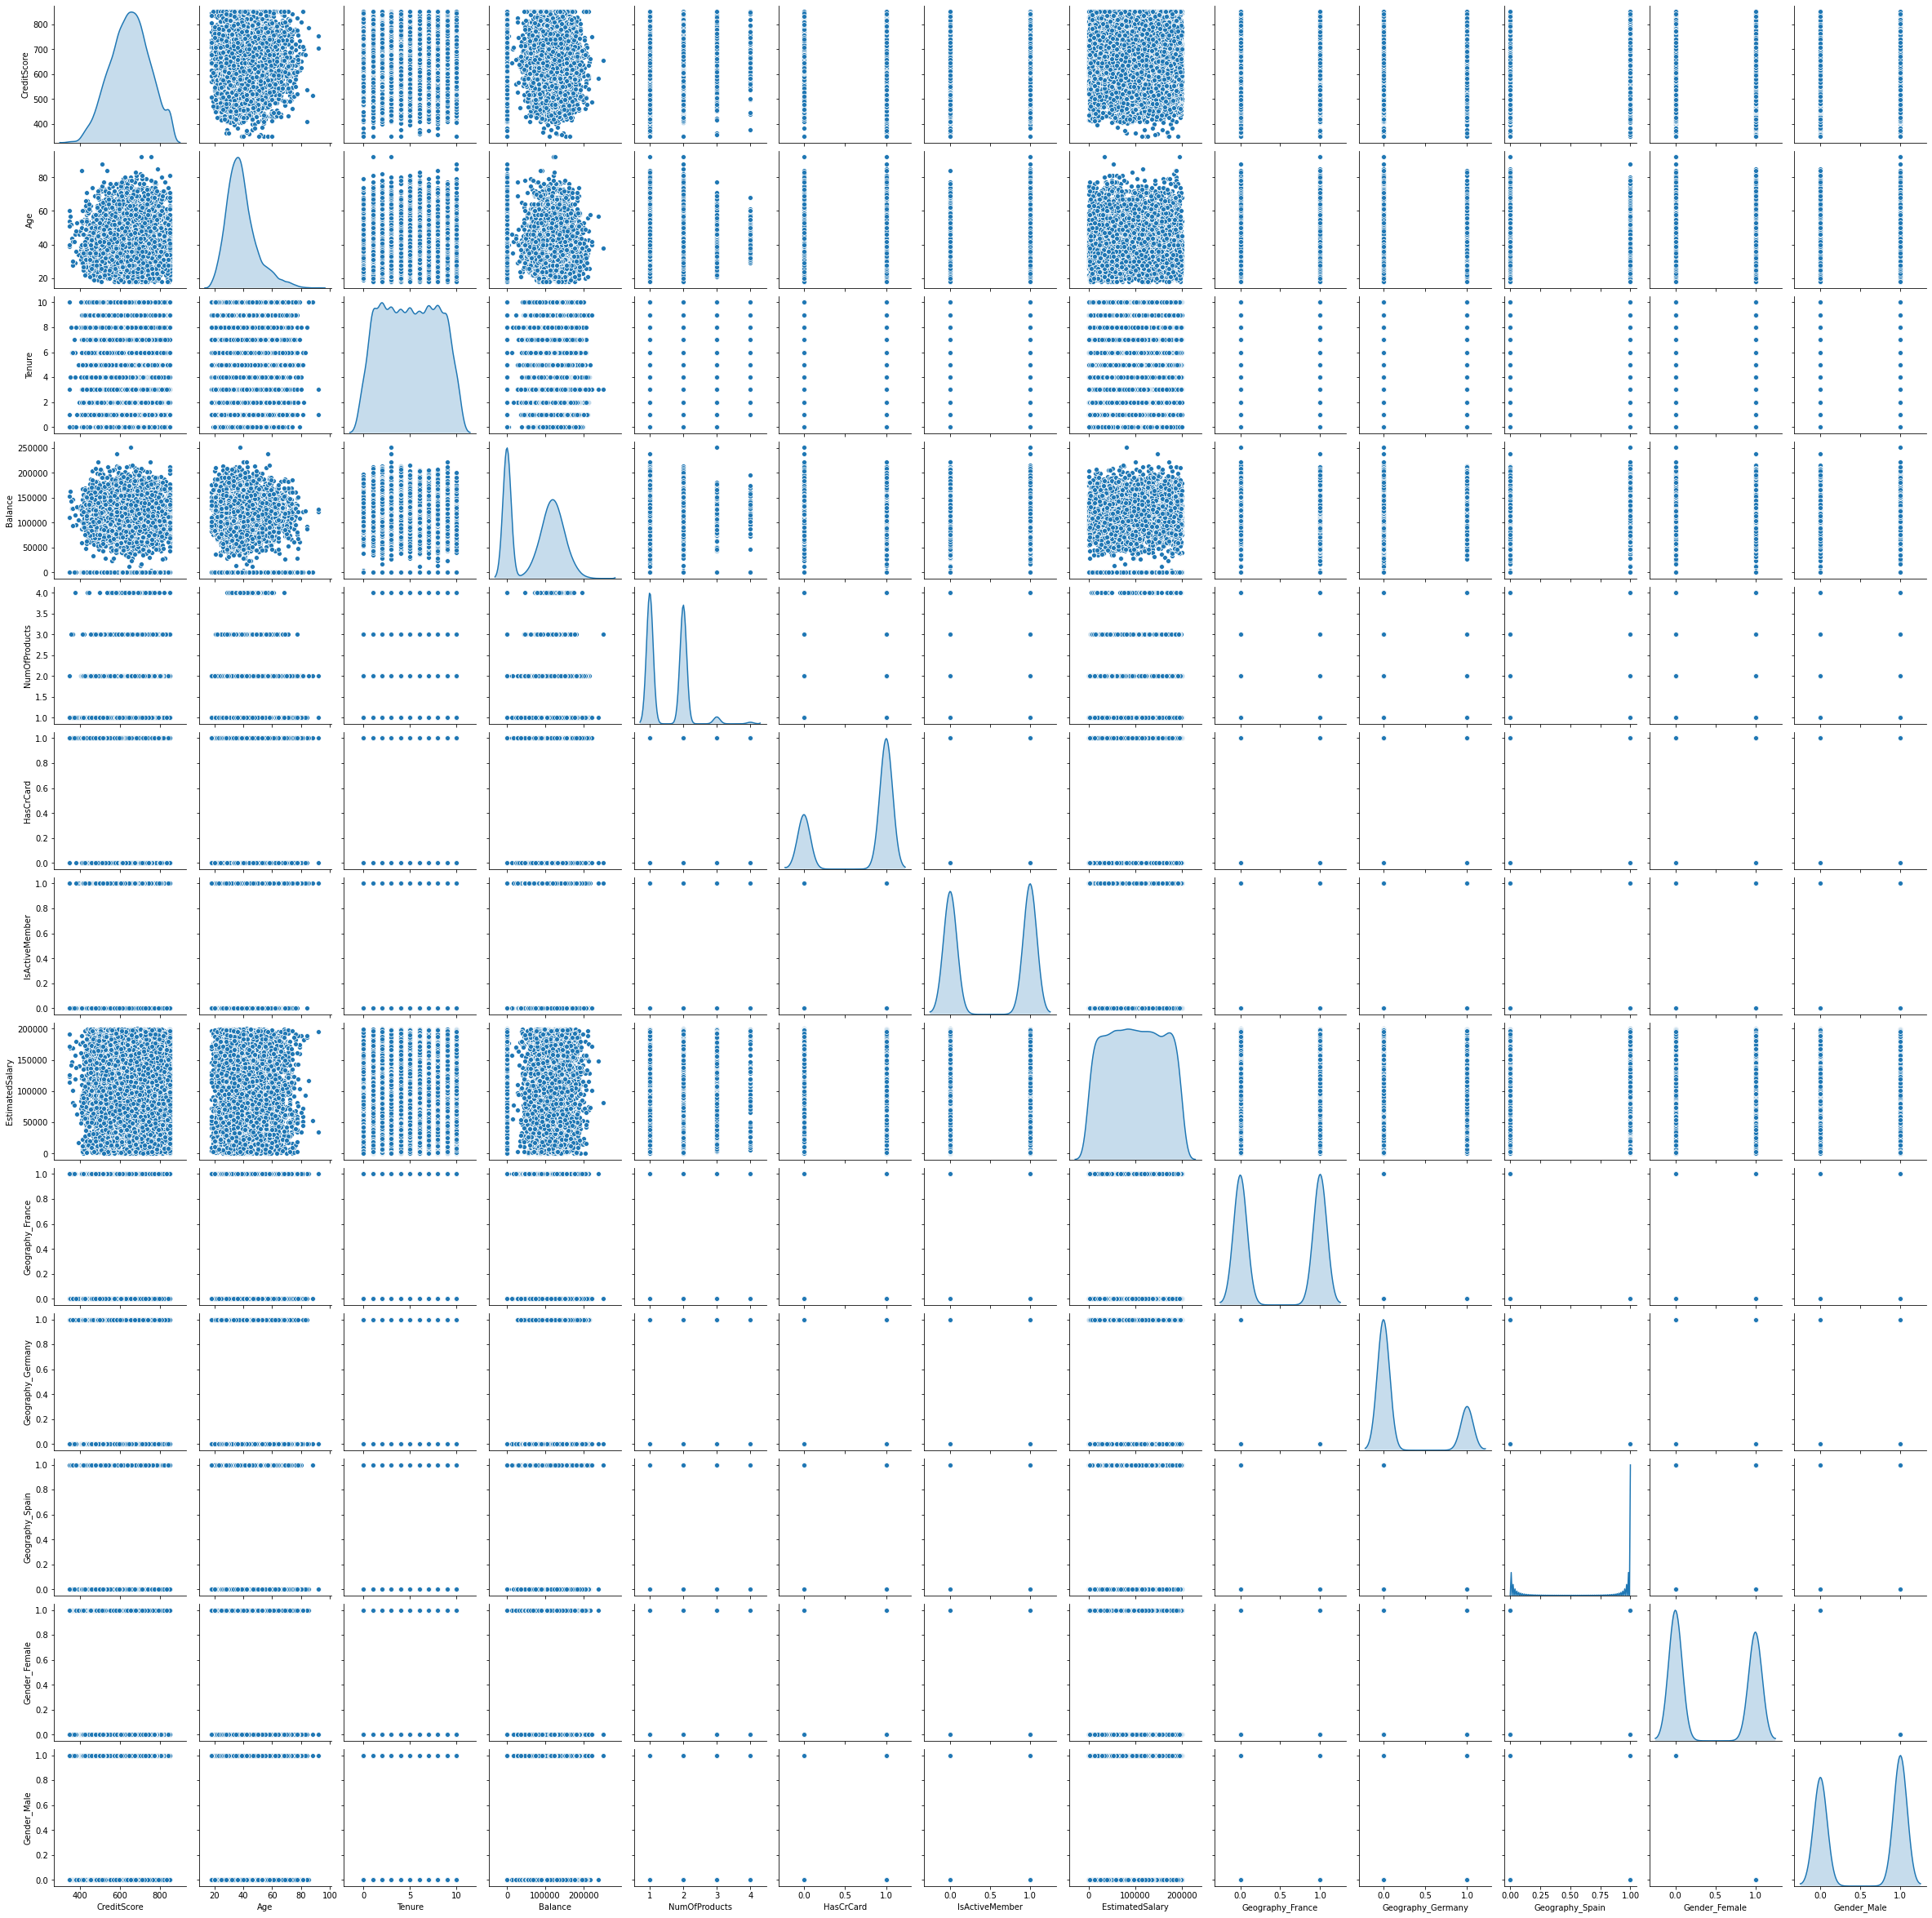

In [22]:
sns.pairplot(X ,diag_kind='kde')

# 4- Train and test split

In [0]:
(X_train, X_test, y_train, y_test)= train_test_split(X, y, test_size=0.30, random_state=1)

In [24]:
X_train.shape

(7000, 13)

In [25]:
X_test.shape

(3000, 13)

# 5-Normalisation of X_train and X_test

In [0]:
from sklearn.preprocessing import StandardScaler

X_train = preprocessing.normalize(X_train)
X_test  = preprocessing.normalize(X_test)

# 6.1- NN Model_A 

In [0]:
# Tf libraries 

import tensorflow as tf


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras import optimizers

In [0]:
# empty shell 
model_A = Sequential()

In [0]:
# adding the layers 
model_A.add(Dense(13, input_shape = (13,), activation = 'relu'))
model_A.add(Dense(16, activation = 'tanh'))
model_A.add(Dense(1, activation = 'sigmoid'))

In [0]:
# Optimiser and loss function 
sgd = optimizers.Adam(lr = 0.001)
model_A.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

In [31]:
model_A.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 423
Trainable params: 423
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_A.fit(X_train, y_train.values, batch_size = 500, epochs = 10, verbose = 1)
# Accuracy for Model_1--> 0.7986

Epoch 1/10
14/14 [==============================] - 0s 2ms/step - loss: 0.7416 - accuracy: 0.2064
Epoch 2/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.6159
Epoch 3/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6363 - accuracy: 0.7986
Epoch 4/10
14/14 [==============================] - 0s 2ms/step - loss: 0.5952 - accuracy: 0.7986
Epoch 5/10
14/14 [==============================] - 0s 2ms/step - loss: 0.5593 - accuracy: 0.7986
Epoch 6/10
14/14 [==============================] - 0s 2ms/step - loss: 0.5323 - accuracy: 0.7986
Epoch 7/10
14/14 [==============================] - 0s 2ms/step - loss: 0.5148 - accuracy: 0.7986
Epoch 8/10
14/14 [==============================] - 0s 2ms/step - loss: 0.5073 - accuracy: 0.7986
Epoch 9/10
14/14 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.7986
Epoch 10/10
14/14 [==============================] - 0s 2ms/step - loss: 0.5022 - accuracy: 0.7986


# 6.2- NN Model_B

In [33]:
# An extra dense layer with more nodes and smaller lr ---> same end accuracy as before but with MUCH more paramters!
model_B = Sequential()

model_B.add(Dense(32, input_shape = (13,), activation = 'relu'))
model_B.add(Dense(64, activation = 'relu'))
model_B.add(Dense(16, activation = 'relu'))
model_B.add(Dense(1, activation = 'sigmoid'))

sgd = optimizers.Adam(lr = 0.001)
model_B.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])
model_B.summary()

model_B.fit(X_train, y_train.values, batch_size = 500, epochs = 10, verbose = 1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 3,617
Trainable params: 3,617
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
14/14 [==============================] - 0s 3ms/step - loss: 0.6406 - accuracy: 0.7714
Epoch 2/10
14/14 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.7986
Epoch 3/10
14/14 [==============================] - 0s

## 6.3- NN Model_C 

In [34]:
model_C = Sequential()

model_C.add(Dense(13, input_shape = (13,), activation = 'relu'))
model_C.add(Dense(32, activation = 'relu'))
model_C.add(Dense(16, activation = 'tanh'))
model_C.add(Dense(1, activation = 'sigmoid'))

sgd = optimizers.Adam(lr = 0.01)
model_C.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])
model_C.summary()

model_C.fit(X_train, y_train.values, batch_size = 500, epochs = 10, verbose = 1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_8 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 1,175
Trainable params: 1,175
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
14/14 [==============================] - 0s 2ms/step - loss: 0.5321 - accuracy: 0.7884
Epoch 2/10
14/14 [==============================] - 0s 2ms/step - loss: 0.5002 - accuracy: 0.7986
Epoch 3/10
14/14 [==============================] - 0s

the Accuracy seems stalled at at 80% ---- let's try all three Model s for evaluation.


#7- Prediction using X_test and y_test

In [36]:
results = model_A.evaluate(X_test, y_test.values)

94/94 [==============================] - 0s 2ms/step - loss: 0.5115 - accuracy: 0.7910


In [37]:
results = model_B.evaluate(X_test, y_test.values)

94/94 [==============================] - 0s 2ms/step - loss: 0.5079 - accuracy: 0.7910


In [38]:
results = model_C.evaluate(X_test, y_test.values)

94/94 [==============================] - 0s 1ms/step - loss: 0.5074 - accuracy: 0.7910


In [0]:
# All same results : but Model_A is simpler  on resources.

## 8- Confusion matrix

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

y_pred = model_A.predict_classes(X_test, batch_size=200, verbose=0)

print('Accuracy Model (Dropout):'+ str(model_A.evaluate(X_test,y_test.values)[1]))
print('Recall_score: '           + str(recall_score(y_test.values,y_pred)))
print('Precision_score: '        + str(precision_score(y_test.values, y_pred)))
print('F-score: '                + str(f1_score(y_test.values,y_pred)))
confusion_matrix(y_test.values, y_pred)

94/94 [==============================] - 0s 2ms/step - loss: 0.5115 - accuracy: 0.7910
Accuracy Model (Dropout):0.7910000085830688
Recall_score: 0.0
Precision_score: 0.0
F-score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[2373,    0],
       [ 627,    0]])

Conclusion : 
Not my best project . Still lost on how to decide the number  of layers and neurones and activation functions.

It seems we are just correctly predicting around 80% of the clients that decide to leave the bank or not .
Better than a random guess but maybe it can improve with further elaboaration and engineering of the layering ...
something that needs further study down the road
 .

Edouard Toutounji - April 30 2020.